# wk11 Demo - Decision Trees
__`MIDS w261: Machine Learning at Scale | UC Berkeley School of Information | Fall 2022`__

This week we'll be looking at Decision Trees

In class today we'll start out by reviewing the Decision Tree algorithm. We'll look at Regression and Classification trees, learning, pruning, and evluation. We'll extend our discussion to Ensemble methods, including Random Forests, Bagging, and Boosting.  

By the end of today's demo you should be able to:  
* ... __describe__ Decision Tree CART algorithm  
* ... __identify__ Assumptions/constraints for learning DTs
* ... __explain__ The difference between regression trees and classification trees
* ... __explain__ The difference between bagging, RF, and boosting
* ... __describe__ How to run Classification Pipelines using MLlib
* ... __explain__ Using Prophet for EDA of Time Series


__`Additional Resources:`__    
Chapter 9.2 ESL (or ISL Chapter 8) - Tree-Based Methods    
https://explained.ai/decision-tree-viz/index.html - How to visualize decision trees      
https://www.youtube.com/watch?v=iOucwX7Z1HU "Wisdom of the crowd" (jelly beans)      
https://explained.ai/gradient-boosting/index.html - Gradient Booted Models (GBMs) explained   
https://statweb.stanford.edu/~jhf/ftp/trebst.pdf - Greedy Function Approximation - a Gradient Boosting Machine  
https://statweb.stanford.edu/~jhf/ftp/stobst.pdf - Stochastic Gradient Boosting   
https://xgboost.readthedocs.io/en/latest/tutorials/model.html XGBoost Docs
https://www.databricks.com/blog/2020/01/27/time-series-forecasting-prophet-spark.html

In [0]:
pip install prophet

Python interpreter will be restarted.
Python interpreter will be restarted.


# I. Decision Tree Review 
*Based on ESL Chapter 9.2 - Tree Based Methods*

## Benefits
* One of the most popular approaches to ML in  practice
* Can handle numeric, categorical, and ordinal  features
* No preprocessing required, no standardization/scaling
* Handles Missing values naturally
* NAs do not affect performance metrics
* Interaction features
* Highly Scalable
* Variable selection
* Excellent performance on a variety of problems
* Off the shelf with very few hyperparameters


## Approach
* A decision tree represents a hierarchical  segmentation of the data
* The original segment is called the root node and is the entire data set
* The root node is partitioned into two or more segments by applying a series of simple rules  over input variables
* For example, `risk == low`, vs `risk == not low`
* Each rule assigns the observations to a segment based on its  input value
* Each resulting segment can be further  partitioned into sub-segments, and so  on
* For example `risk == low` can be partitioned into  `income == low` and `income == not low`
* The segments are also called nodes,  and the final segments are called leaf  nodes or leaves

<img src="https://github.com/kyleiwaniec/w261_assets/blob/master/images/wk12_demo/fig9.2-ESL-tree-diagrams.png?raw=true" width=100%>


*Partitions and CART. Left panel shows a partition of a
two-dimensional feature space by recursive binary splitting, as used in CART,
applied to some fake data. Middle panel shows the tree corresponding
to the partition in the left panel, and a perspective plot of the
prediction surface appears in the right panel.* __Based on FIGURE 9.2 Elements of Statistical Learning.__

## CART - Classification And Regression Trees

## Regression Trees
### How do we grow a regression tree?

Our data consists of \\(N\\) observations with \\(p\\) features. Suppose we partition the data into \\(M\\) regions \\(R_1, R_2,...,R_M\\) , and model the response as a constant \\(c_m\\) in each region.

$$f(x) = \sum_{m=1}^{M}c_mI(x \in R_m)$$

Using the sum of squares criterion: $$
\sum(y_i - f(x_i))^2 
$$

The prediction \\(\hat c_m\\) is just the average of \\(y_i\\) in region \\(R_m\\): $$
\hat c_m = avg(y_i|x_i \in R_m)
$$

__DISCUSSION__ 

* Can we find the best binary partition in terms of minimum sum of squares? 
* What is the big \\(O\\) complexity of this problem?
* What is another criterion often used for regression tree partitioining?

### Since finding the best binary partition in terms of minimum sum of squares is computationaly infeasable, we proceed with a greedy algorithm
Starting with all of the data, consider a splitting variable \\(j\\) and a split point \\(s\\), we define the pair of half planes:

$$
R_1(j,s) = \{X|X_j \leq s\} \text{ and } R_2(j,s) = \{X|X_j \gt s\}
$$

We seek the splitting variable \\(j\\) and split point \\(s\\) that solve  

$$
\min\_{j,s} [\min\_{c\_1} \sum\_{x\_i \in R\_1(j,s)} (y\_i - c\_1)^2 + \min\_{c\_2} \sum\_{x\_i \in R\_2(j,s)} (y\_i - c\_2)^2]
$$

For any choice \\(j\\) and \\(s\\), the inner minimization is solved by

$$
\hat c_1 = avg(y_i|x_i \in R_1(j,s)) \text{ and } \hat c_2 = avg(y_i|x_i \in R_2(j,s))
$$

For each splitting variable, the determination of the split point \\(s\\) can be done very quickly and hence by scanning through all of the inputs, determination of the best pair \\((j,s)\\) is feasible.

Having found the best split, we partition the data into the two resulting regions and repeat the splitting process on each of the two regions. Then this process is repeated on all of the resulting regions.

This video is a great resource to understand it visually: https://www.youtube.com/watch?v=g9c66TUylZ4&ab_channel=StatQuestwithJoshStarmer

__DISCUSSION__ 

Consider three types of variables: continuous, ordered (ex. ratings), and categorical
* How many split points will we have? 
* Notice that in equation 9.12, we split our data based on whether it is smaller or larger than our split point \\(s\\). How can we find split points for categorical variables (ie, variables which are not ordered)?

### Brieman's theorem

For unordered domains, there are \\(p \choose 2\\) possible splits, where \\(p\\) is the number of categories.   

Breiman presents an algorithm for finding the best split predicate for a categorical attribute without evaluating
all possible subsets of \\(p\\), based on the observation that the optimal split predicate is a subsequence in the list of values for \\(p_i\\) sorted by the average \\(y\\) value.

<!-- <img src="brieman.png"> -->

## EXERCISE 1
Run the code cells below, and answer the following questions.

In [0]:
# GENERATE DATASET: Run this cell as is
import pandas as pd

x = ["c","b","b","c","a","b","a"]
y = [0.8,0.9,1.4,0.6,3.2,2.5,3.0]
    

df = pd.DataFrame([x,y]).transpose()
df.columns = ['x', 'y']
df

,x,y
0,c,0.8
1,b,0.9
2,b,1.4
3,c,0.6
4,a,3.2
5,b,2.5
6,a,3.0


In [0]:
# GET MEAN VALUES OF Y : Run this cell as is
df["y"] = pd.to_numeric(df["y"])
mean_y = df.groupby('x').mean().reset_index().sort_values(by=['y'])
mean_y

,x,y
2,c,0.7
1,b,1.6
0,a,3.1


__DISCUSSION__
* How many possible split points are there to start with?
* How many possible split points are there using Brieman's method? List the splits.
* How large should we grow the tree? What are the tradeoffs?

### Cost-Complexity Pruning 
ESL, pg. 308

The preferred strategy is to grow a large tree \\(T_0\\) stopping the splitting
process only when some minimum node size (say 5) is reached. Then this
large tree is pruned using cost-complexity pruning, which we now describe.
We define a subtree \\(T \subset T_0 \\) to be any tree that can be obtained by
pruning \\(T_0\\), that is, collapsing any number of its internal (non-terminal)
nodes. We index terminal nodes by \\(m\\), with node \\(m\\) representing region
\\(R_m\\). Let \\(\lvert{T}\rvert \\) denote the number of terminal nodes in \\(T\\). Letting

$$
N\_m = \\# \\{x\_i \in R\_m \\},
$$

$$
\hat{c\_m} = \frac{1}{N\_m} \sum\_{x_i \in R_m} y_i,
$$

$$
Q\_m(T) = \frac{1}{N\_m} \sum\_{x_i \in R_m} (y_i - \hat{c\_m})^2,
$$

we define the *cost complexity criterion*

$$
C\_{\alpha}(T) = \sum_{m=1}^{|T|} N\_m Q\_m(T) + \alpha|T|
$$

The idea is to find, for each \\(\alpha\\), the subtree \\(T\_{\alpha} \subseteq T\_0\\) to minimize \\(C\_{\alpha}(T)\\).
The tuning parameter \\(\alpha \geq 0\\) governs the tradeoff between tree size and its
goodness of fit to the data. Large values of \\(\alpha\\) result in smaller trees \\(T\_{\alpha}\\), and
conversely for smaller values of \\(\alpha\\). As the notation suggests, with \\(\alpha = 0\\) the
solution is the full tree \\(T\_0\\).

For each \\(\alpha\\) one can show that there is a unique smallest subtree \\(T\_{\alpha}\\) that
minimizes \\(C\_{\alpha}(T)\\). To find \\(T\_{\alpha}\\) we use *weakest link pruning*: we successively
collapse the internal node that produces the smallest per-node increase in
\\(mN\_mQ\_m(T)\\), and continue until we produce the single-node (root) tree.
This gives a (finite) sequence of subtrees, and one can show this sequence
must contain \\(T\_{\alpha}\\). See Breiman et al. (1984) or Ripley (1996) for details.

Estimation of \\(\alpha\\) is achieved by five- or tenfold cross-validation: we choose
the value \\(\hat{\alpha}\\) to minimize the cross-validated sum of squares. Our final tree
is \\(T\_{\hat{\alpha}}\\). See Breiman et al. (1984) or Ripley (1996) for details.

## Classification Trees

__DISCUSSION__
* What modifications do we need to make for classification trees?

<img src="https://github.com/kyleiwaniec/w261_assets/blob/master/images/wk12_demo/purity-functions.png?raw=true" width=100%>

__FIGURE 9.3.__ *Node impurity measures for two-class classification, as a function
of the proportion p in class 2. Cross-entropy has been scaled to pass through
(0.5, 0.5).*

In a node \\(m\\), representing a region \\(R\_m\\) with \\(N\_m\\) observations, let

$$
\hat{P}\_{mk} = \frac{1}{N\_m}\sum\_{x_i \in R\_m} I(y\_i = k)
$$

the proportion of class \\(k\\) observations in node \\(m\\). We classify the observations
in node \\(m\\) to class \\(k(m)\\) = \\(argmax\_k\\) \\(\hat{p}\_{mk}\\), the majority class in
node \\(m\\). Different measures \\(Q\_m(T)\\) of node impurity include the following:

<img src="https://github.com/kyleiwaniec/w261_assets/blob/master/images/wk12_demo/purity-equations.png?raw=true" width=50%>

All three are similar, but crossentropy and the Gini index are differentiable, and hence more amenable to numerical optimization. 

In addition, cross-entropy and the Gini index are more sensitive to changes
in the node probabilities than the misclassification rate. For example, in
a two-class problem with 400 observations in each class (denote this by
(400, 400)), suppose one split created nodes (300, 100) and (100, 300), while
the other created nodes (200, 400) and (200, 0). Both splits produce a misclassification
rate of 0.25, but the second split produces a pure node and is
probably preferable. Both the Gini index and cross-entropy are lower for the
second split. For this reason, either the Gini index or cross-entropy should
be used when growing the tree. 

To guide cost-complexity pruning, any of the three measures can be used, but typically it is the misclassification rate.

## Other Issues

* __Why binary splits?__
Rather than splitting each node into just two groups at each stage (as
above), we might consider multiway splits into more than two groups. While
this can sometimes be useful, it is not a good general strategy. The problem
is that multiway splits fragment the data too quickly, leaving insufficient
data at the next level down. Hence we would want to use such splits only
when needed. Since multiway splits can be achieved by a series of binary
splits, the latter are preferred.

* __Missing Predictor Values__
See ESL p.311 - Surrogate predictors and split points.

# II. Ensembles and gradient boosting

The basic idea with ensembles is that several independent models can be combined to make a better model.  One example of this comes from the Netflix prize where several of the top competitors for the million dollar prize joined forced and averaged their models to produce a superior model.  There were a handful of competitors and that was enough improvement to put them into a tie for the best results.  

Generally, ensembles include many more than a handful of fully trained models.  The package guidance for the R package gbm (gradient boosting machine) suggests using 3000 models, for example.  How can that many different models be generated?  All of the models need to be solving more or less the same problem.  You can't do them by hand.  You need a systematic method for generating these models.  We'll look quickly at two different methods.  

## Independent methods
Build individual trees independently

### Bagging & Random Forests
First we'll look at Bootstrap Aggregation (called bagging).  That was invented by late Professor Leo Breiman, the famous Berkeley statistician.  Professor Breiman invented bagging to deal with the well known high-variance of binary decision trees.  Here's how it works.  

Generate a multitude of different training sets for the same problem.  Train a binary decision tree for each training set and average the results.  To generate multiple training sets take a random sample of the data.  The nominal formula for generating random training sets is to take a sample whose size is 50% of the original data set and extract the data from the original by sample with replacement.  Here's are some simple example to illustrate.

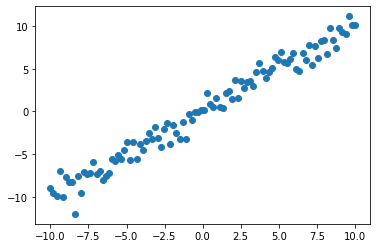

In [0]:
## Data generator.  
import numpy as np 
from sklearn import tree
import matplotlib.pyplot as plt


def EnsembleDataGen(npts, stdDev):
    #Define data set:
    #Starter is X sampled regularly in [-10, 10], Y = X + noise
    #Try swapping Y = X + noise for Y = np.sin(X) + noise
    X = np.linspace(-10.0, 10.0, npts)
    Y = X + np.random.normal(0.0, stdDev, npts)
#     Y = np.sin(X) + np.random.normal(0.0, stdDev, npts)
    return X.reshape([-1,1]), Y.reshape([-1,1])

X,Y = EnsembleDataGen(100, 1.0)
plt.scatter(X,Y)
display(plt.show())

### Building trees for bagging
The core idea for bagging is to build high variance (complex) trees and then overcome the high-variance by average.  With binary decision trees the depth controls complexity (and variance).  So the trees for bagging are deeper than you might train if you were only building one tree and were trying to do the best trade off between bias and variance for a single tree.  One of the benefits of ensemble methods is that they don't require quite as much fussing with regularization parameters as single trees.

In [0]:
#Take random samples with replacement, build trees for each one and average.  
from sklearn.tree import DecisionTreeRegressor

#define weighted sum function to accumulate - (function currying)
def wt_sum_fcn(f1, f2, wt):
    def wsf(x):
        return (f1(x) + wt * f2(x))
    return wsf

def Bagging(nTrees, nDepth, bagFrac, X, Y):
    """
    nTrees - number of trees in ensemble
    nDepts - max depth of trees
    bagFrac - fractional size of bags relative to full data set
    X, Y - features, labels
    
    Return: Prediction function that is average of prediction functions of trees in ensemble
    """
    nDataPts = len(X)
    wt = float(1.0 / nTrees)
    nSamp = int(bagFrac * nDataPts)
        
    #Define function T to accumulate average prediction functions from trained trees.  
    #initialize T to fcn mapping all x to zero to start 
    T = lambda x: 0.0
    
    #loop to generate individual trees in ensemble
    for i in range(nTrees):
        
        #take a random sample from the data
        sampIdx = np.random.choice(nDataPts, nSamp)
        xTrain = X[sampIdx]
        yTrain = Y[sampIdx]
        
        #build a tree on the sampled data
        tree = DecisionTreeRegressor(max_depth=nDepth)
        tree.fit(xTrain, yTrain)
        
        #Add the new tree with a weight
        T = wt_sum_fcn(T, tree.predict, wt)
    return T
    

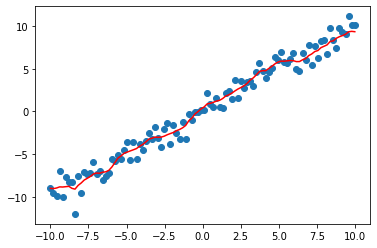

In [0]:
nTrees = 100  #try changing the number of trees being built
nDepth = 10   #fairly deep for 100 data points
bagFrac = 0.2   #Bag fraction - how many points in each of the random subsamples.  

bag = Bagging(nTrees, nDepth, bagFrac, X, Y)

result = bag(X)

plt.plot(X, result, 'r')
plt.scatter(X,Y)
display(plt.show())

#### Some things to try
1.  Change the number of trees in the ensemble through a range of values 1, 3, 5, 10.  Notice how the prediction smooths out.  
2.  Change the trees to depth 1 trees.  What happens as you put more and more trees into the ensemble?  This is a good example showing that no amount of averaging will overcome a bias error.  This is why it's important to grow deep trees for bagging.  
2.  In the code generator there's a suggestion to change the dependence of Y on X into a sinusoid.  Make that change and try some values for tree depth, number of trees in the ensemble to see what effect it has.  Also change the number of points in the data set and see what's required to get a relatively smooth fit.

### Random Forest

Random forest is similar to bagging in that we take sub-samples of the data to train individual trees and combine the results to form the final prediction. At a high level, the difference is the sampling method. RF builds trees on subsets of the features (columns), while bagging builds trees on subsets of the data (rows).    

In reality we often implement a combination of bagging and RF where we take a sample of data and features.


__Some considerations for building ensembles__:
* __Tree diversity__ - Creating an ensemble in which each classifier is as different as possible
while still being consistent with the training set is theoretically known to be
an important feature for obtaining improved ensemble performance.

* __Sub-sample distribution__ - Preprocess using K-means to insure that each tree contains some data points from each cluster, thus the individual trees distributions are similar to the original full dataset.

### Combination Methods for ensembles

* Majority Voting
* Performance Weighting
* etc..

See also *Data Mining with Decision Trees: Theory and Applications; Lior Rokach and Oded Maimon* Chapter 7.3

## Dependent methods
Build trees sequentially which optimize for the error in predictions from the previous iteration.

### Gradient Boosting
Gradient boosting operates on a different principle from bagging.  The principle is easiest to explain for a regression problem like the one you just saw for bagging.  The idea with gradient boosting is that you fit a tree to the problem, then generate predicitons with that tree and subtract a small amount of the tree's prediction from the original regression labels.  Then the next tree gets trained on the leftovers.  

See also: https://explained.ai/gradient-boosting/index.html

In [0]:
def GradientBoosting(nTrees, nDepth, gamma, bagFrac, X, Y):
    nDataPts = len(X)
    nSamp = int(bagFrac * nDataPts)
    
    # Define function T to accumulate average prediction functions from trained trees.  
    # initialize T to fcn mapping all x to zero to start 
    T = lambda x: 0.0
    
    # loop to generate individual trees in ensemble
    for i in range(nTrees):
        
        # take a random sample from the data
        sampIdx = np.random.choice(nDataPts, nSamp)
        
        xTrain = X[sampIdx]
        
        # estimate the regression values with the current trees.  
        yEst = T(xTrain)
        
        # subtract the estimate based on current ensemble from the labels
        yTrain = Y[sampIdx] - np.array(yEst).reshape([-1,1])
        
        # build a tree on the sampled data using residuals for labels
        tree = DecisionTreeRegressor(max_depth=nDepth)
        tree.fit(xTrain, yTrain)
                
        # add the new tree with a learning rate parameter (gamma)
        T = wt_sum_fcn(T, tree.predict, gamma)
    return T

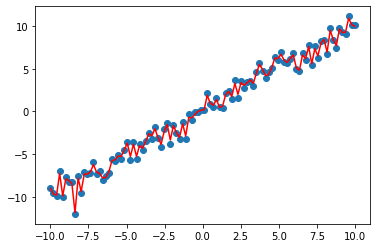

In [0]:
nTrees = 500  # try changing the number of trees being built
nDepth = 3   # fairly deep for 100 data points
gamma = 0.1
bagFrac = 0.5   # Bag fraction - how many points in each of the random subsamples.  

gbst = GradientBoosting(nTrees, nDepth, gamma, bagFrac, X, Y)

result = gbst(X)

plt.plot(X, result, 'r')
plt.scatter(X,Y)
display(plt.show())

### Comments and some things to try
You may have noticed that the sampling machinery from bagging was left in the code for gradient boosting.  Friedman's first paper "Greedy Function Approximation" did not include sampling the input data.  But sampling and the basic mechanics of functional gradient descent are separate matters and Friedman's second paper "Stochastic Gradient Boosting" added that element.  Links to both these papers can be found below.  

#### Some things to try
- Try running some of the same experiments as you did with bagging. Change the tree depth, number of trees etc.  Also try the sine function for Y(X) and see how gradient boosting does with it.  

Here are some things that will highlight an important difference between gradient boosting and methods that are primarily variance reduction techniques.  

- Experiment with different tree depths and see how it affects the accuracy of the final model.  With bagging, you saw that using depth 1 trees resulted in a bias error that could not be overcome by adding more trees.  Does that happen with gradient boosting?  

Since gradient boosting is constantly changing the labels to emphasize the portions of the X-space where it's making the most mistakes, it will eventually pay so much attention to the edges of the data that it will start putting split points for depth 1 trees at the extreme edges of the data.  That raises the question: "Why would you ever use trees deeper than 1 with gradient boosting?"  

The reason for adding tree depth with gradient boosting is to cover problems where there is joint dependence on two or more variables and that dependence plays an important role in predicting the labels.  Modeling two-way or dependence requires that pairs of variables both affect some of the splits in a single tree.  That requires more than a single split in the trees.  Start with relatively shallow trees for gradient boosting.  After you've got that dialed in, then try more depth to see if you get an improvement.  

I hope you like gradient boosted trees.  It has won more Kaggle competitions than any other algo.

### References:
https://explained.ai/gradient-boosting/index.html - GBM explained (__READ THIS FIRST__)    
https://statweb.stanford.edu/~jhf/ftp/trebst.pdf - Greedy Function Approximation - a Gradient Boosting Machine  
https://statweb.stanford.edu/~jhf/ftp/stobst.pdf - Stochastic Gradient Boosting

# Prediction

For __regression__ problems, the predicted response for an observation is the weighted average of the predictions using selected trees only. That is,


$$
\hat{y}\_{bag} = \frac{1}{\sum_{t=1}^{T}\alpha_t I(t\in S)} \\sum_t^T \\alpha_t \\hat{y}\_t I(t\in S)
$$  

* \\( \hat{y_i} \\) is the prediction from tree t in the ensemble.

* \\(S\\) is the set of indices of selected trees that comprise the prediction. \\(I(t\in S)\\) is 1 if \\(t\\) is in the set \\(S\\), and 0 otherwise.

* \\(\alpha_t\\) is the weight of tree \\(t\\).

For __classification__ problems, the predicted class for an observation is the class that yields the largest weighted average of the class posterior probabilities (i.e., classification scores) computed using selected trees only. That is,

* For each class \\(c\in C\\) and each tree \\(t=1...T\\), predict computes \\( \hat{P_t}(c|x) \\) which is the estimated posterior probability of class \\(c\\) given observation \\(x\\) using tree \\(t\\). \\(C\\) is the set of all distinct classes in the training data. 

* To make a prediction, compute the weighted average of the class posterior probabilities over the selected trees. (Note: t goes from t=1 to t=T in the summation)

$$
\hat{P}\_{bag}(c|x) = \frac{1}{\sum_{t=1}^{T}\alpha_t I(t\in S)} \sum_t^T \alpha_t \hat{P}\_t(c|x) I(t\in S)
$$  

* The predicted class is the class that yields the largest weighted average. (Let g stand for "bag" in this next eq, due to latex rendering issues)

$$
\hat{y}\_g = argmax\_{ c \in C} \hat{P}\_g(c|x)
$$

### Handling Missing Values when Applying Classification Models
http://jmlr.csail.mit.edu/papers/volume8/saar-tsechansky07a/saar-tsechansky07a.pdf   
It is important to distinguish two contexts: features may be missing at induction time, in the
historical “training”data, or at prediction time, in to-be-predicted “test”cases. This paper compares
techniques for handling missing values at prediction time.

1. __Discard instances.__
2. __Acquire missing values.__
3. __Imputation.__
4. __Reduced-feature Models:__ This can be accomplished by delaying
model induction until a prediction is required, a strategy presented as “lazy” classificationtree induction by Friedman et al. (1996). Alternatively, for reduced-feature modeling one may
store many models corresponding to various patterns of known and unknown test features.

## Feature Importances

Explaining Feature Importance by example of a Random Forest
- https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

References:
- https://explained.ai/rf-importance/index.html    
- https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-9-307    
- http://blog.datadive.net/interpreting-random-forests/
- http://blog.datadive.net/random-forest-interpretation-conditional-feature-contributions/

# III. Decision Trees with Spark MLLib

In [0]:
## Imports
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.feature import VectorAssembler
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
import pandas as pd

In [0]:
## Loading the data
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['label'] = pd.Series(iris.target) #target classes 0, 1, 2
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
## Building the pipeline
data = sqlContext.createDataFrame(df_iris)
features = iris.feature_names

# Vector Asembler
va = VectorAssembler(inputCols = features, outputCol= 'features')
va_df = va.transform(data)
va_df = va_df.select(['features', 'label'])

display(va_df)

features,label
"Map(vectorType -> dense, length -> 4, values -> List(5.1, 3.5, 1.4, 0.2))",0
"Map(vectorType -> dense, length -> 4, values -> List(4.9, 3.0, 1.4, 0.2))",0
"Map(vectorType -> dense, length -> 4, values -> List(4.7, 3.2, 1.3, 0.2))",0
"Map(vectorType -> dense, length -> 4, values -> List(4.6, 3.1, 1.5, 0.2))",0
"Map(vectorType -> dense, length -> 4, values -> List(5.0, 3.6, 1.4, 0.2))",0
"Map(vectorType -> dense, length -> 4, values -> List(5.4, 3.9, 1.7, 0.4))",0
"Map(vectorType -> dense, length -> 4, values -> List(4.6, 3.4, 1.4, 0.3))",0
"Map(vectorType -> dense, length -> 4, values -> List(5.0, 3.4, 1.5, 0.2))",0
"Map(vectorType -> dense, length -> 4, values -> List(4.4, 2.9, 1.4, 0.2))",0
"Map(vectorType -> dense, length -> 4, values -> List(4.9, 3.1, 1.5, 0.1))",0


In [0]:
## Train pipeline
(train, test) = va_df.randomSplit([0.8, 0.2])
dtc = DecisionTreeClassifier(featuresCol='features', labelCol='label')
dtc = dtc.fit(train)

In [0]:
## Predict on Test
pred = dtc.transform(test)  # pred dataframe
display(pred)

features,label,rawPrediction,probability,prediction
"Map(vectorType -> dense, length -> 4, values -> List(4.3, 3.0, 1.1, 0.1))",0,"Map(vectorType -> dense, length -> 3, values -> List(36.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 3, values -> List(1.0, 0.0, 0.0))",0.0
"Map(vectorType -> dense, length -> 4, values -> List(4.6, 3.6, 1.0, 0.2))",0,"Map(vectorType -> dense, length -> 3, values -> List(36.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 3, values -> List(1.0, 0.0, 0.0))",0.0
"Map(vectorType -> dense, length -> 4, values -> List(4.8, 3.4, 1.6, 0.2))",0,"Map(vectorType -> dense, length -> 3, values -> List(36.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 3, values -> List(1.0, 0.0, 0.0))",0.0
"Map(vectorType -> dense, length -> 4, values -> List(4.9, 3.0, 1.4, 0.2))",0,"Map(vectorType -> dense, length -> 3, values -> List(36.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 3, values -> List(1.0, 0.0, 0.0))",0.0
"Map(vectorType -> dense, length -> 4, values -> List(4.9, 3.1, 1.5, 0.2))",0,"Map(vectorType -> dense, length -> 3, values -> List(36.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 3, values -> List(1.0, 0.0, 0.0))",0.0
"Map(vectorType -> dense, length -> 4, values -> List(5.0, 3.0, 1.6, 0.2))",0,"Map(vectorType -> dense, length -> 3, values -> List(36.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 3, values -> List(1.0, 0.0, 0.0))",0.0
"Map(vectorType -> dense, length -> 4, values -> List(5.0, 3.4, 1.5, 0.2))",0,"Map(vectorType -> dense, length -> 3, values -> List(36.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 3, values -> List(1.0, 0.0, 0.0))",0.0
"Map(vectorType -> dense, length -> 4, values -> List(5.2, 3.5, 1.5, 0.2))",0,"Map(vectorType -> dense, length -> 3, values -> List(36.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 3, values -> List(1.0, 0.0, 0.0))",0.0
"Map(vectorType -> dense, length -> 4, values -> List(5.4, 3.9, 1.3, 0.4))",0,"Map(vectorType -> dense, length -> 3, values -> List(36.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 3, values -> List(1.0, 0.0, 0.0))",0.0
"Map(vectorType -> dense, length -> 4, values -> List(5.5, 4.2, 1.4, 0.2))",0,"Map(vectorType -> dense, length -> 3, values -> List(36.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 3, values -> List(1.0, 0.0, 0.0))",0.0


Prediction Accuracy: 0.899607843137255
/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
Class 0.0 precision = 1.0
Class 0.0 recall = 1.0
Class 0.0 F1 Measure = 1.0
Class 1.0 precision = 0.8571428571428571
Class 1.0 recall = 0.75
Class 1.0 F1 Measure = 0.7999999999999999
Class 2.0 precision = 0.7777777777777778
Class 2.0 recall = 0.875
Class 2.0 F1 Measure = 0.823529411764706
Weighted recall = 0.9
Weighted precision = 0.9026455026455027
Weighted F(1) Score = 0.899607843137255
Weighted F(0.5) Score = 0.901010101010101
Weighted false positive rate = 0.03636363636363636


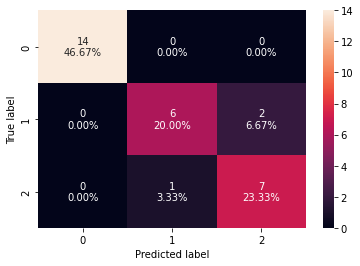

In [0]:
## Performance: accuracy
import seaborn as sns
evaluator=MulticlassClassificationEvaluator(predictionCol='prediction')
acc = evaluator.evaluate(pred)
print(f'Prediction Accuracy: {acc}')

## Performance: Precision and Recall per Label
predictionAndLabels = pred.select(['prediction', 'label']).rdd.map(lambda row: (float(row['prediction']), float(row['label'])))

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Statistics by class
labels = [0.0, 1.0, 2.0]
for label in sorted(labels):
    print("Class %s precision = %s" % (label, metrics.precision(label)))
    print("Class %s recall = %s" % (label, metrics.recall(label)))
    print("Class %s F1 Measure = %s" % (label, metrics.fMeasure(label, 1.0)))

# Weighted stats
print("Weighted recall = %s" % metrics.weightedRecall)
print("Weighted precision = %s" % metrics.weightedPrecision)
print("Weighted F(1) Score = %s" % metrics.weightedFMeasure())
print("Weighted F(0.5) Score = %s" % metrics.weightedFMeasure(beta=0.5))
print("Weighted false positive rate = %s" % metrics.weightedFalsePositiveRate)

## Confusion Matrix
y_pred = pred.select('prediction').collect()
y_orig = pred.select('label').collect()

def confusion_matrix_sklearn(y_orig, y_pred):
    """
    To plot the confusion_matrix with percentages
    prediction:  predicted values
    original:    original values
    """
    cm = confusion_matrix(y_orig, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(3, 3)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
confusion_matrix_sklearn(y_orig, y_pred)

# IV. Prophet for Time Series

In [0]:
#this dataset is available in databricks-datasets. Use the local filesytem to access with pandas
covid_pandas = pd.read_csv("/dbfs/databricks-datasets/COVID/CSSEGISandData/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv")
covid_pandas

,Province/States,Country/Region,WHO region,WHO region label,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
0,Confirmed,Globally,NaN,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Deaths,Globally,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Confirmed,China,Western Pacific Region,NaN,278.0,309.0,571.0,830.0,1297.0,1985.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Confirmed,Outside of China,NaN,NaN,4.0,5.0,10.0,16.0,23.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Deaths,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Deaths,NaN,Eastern Mediterranean Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,Confirmed,NaN,Region of the Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,Deaths,NaN,Region of the Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Confirmed,NaN,African Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Getting the data in the same format as the blog example

covid_pandas_americas = covid_pandas[covid_pandas["WHO region"] == "Region of the Americas"].drop(columns=["Province/States", "Country/Region", "WHO region", 'WHO region label']).diff(axis=1).fillna(0)

case_sums = (covid_pandas_americas.sum(axis=0)).tolist()
dates = list(covid_pandas_americas)

summed_case_list = list(zip(dates, case_sums))
summed_case_pd = pd.DataFrame(summed_case_list, columns=['ds','y']) #Prophet requires cols "ds" and "y"

#One more step... convert the string date col to datetime
summed_case_pd['ds']= pd.to_datetime(summed_case_pd['ds']) 
summed_case_pd = summed_case_pd[summed_case_pd['ds'] < '2020-06-15']

Out[21]: <AxesSubplot:xlabel='ds'>

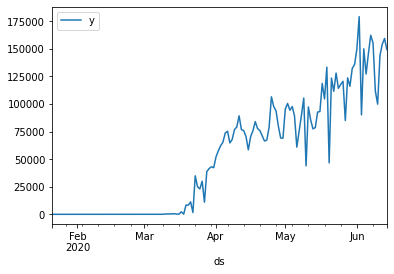

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
summed_case_pd.plot(x='ds', y='y')

In [0]:
from prophet import Prophet

model = Prophet(
    interval_width=0.9,
    growth='linear'
)

model.fit(summed_case_pd)

#set periods to a large number to see window of uncertainty grow
future_pd = model.make_future_dataframe(
    periods=200,
    include_history=True
)

# predict over the dataset
forecast_pd = model.predict(future_pd)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
display(forecast_pd)

ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2020-01-21T00:00:00.000+0000,-11011.98746442225,-33925.69256818793,17443.67108846194,-11011.98746442225,-11011.98746442225,1571.4708450430887,1571.4708450430887,1571.4708450430887,1571.4708450430887,1571.4708450430887,1571.4708450430887,0.0,0.0,0.0,-9440.516619379161
2020-01-22T00:00:00.000+0000,-10536.776906637193,-48157.167581738475,1712.1613425194603,-10536.776906637193,-10536.776906637193,-12727.98426542849,-12727.98426542849,-12727.98426542849,-12727.98426542849,-12727.98426542849,-12727.98426542849,0.0,0.0,0.0,-23264.761172065682
2020-01-23T00:00:00.000+0000,-10061.566348852137,-34679.66864827896,15258.838855612114,-10061.566348852137,-10061.566348852137,-601.7808927808394,-601.7808927808394,-601.7808927808394,-601.7808927808394,-601.7808927808394,-601.7808927808394,0.0,0.0,0.0,-10663.347241632977
2020-01-24T00:00:00.000+0000,-9586.35579106708,-35022.06988699145,13525.871630193344,-9586.35579106708,-9586.35579106708,-357.6968760611659,-357.6968760611659,-357.6968760611659,-357.6968760611659,-357.6968760611659,-357.6968760611659,0.0,0.0,0.0,-9944.052667128246
2020-01-25T00:00:00.000+0000,-9111.145233282023,-27764.312936305712,20890.10305750738,-9111.145233282023,-9111.145233282023,6075.383680535418,6075.383680535418,6075.383680535418,6075.383680535418,6075.383680535418,6075.383680535418,0.0,0.0,0.0,-3035.761552746605
2020-01-26T00:00:00.000+0000,-8635.934675496965,-29818.086678034753,18192.369725977933,-8635.934675496965,-8635.934675496965,1529.0129066047111,1529.0129066047111,1529.0129066047111,1529.0129066047111,1529.0129066047111,1529.0129066047111,0.0,0.0,0.0,-7106.921768892254
2020-01-27T00:00:00.000+0000,-8160.724117751284,-30173.93635246456,20556.800326151173,-8160.724117751284,-8160.724117751284,4511.594602099738,4511.594602099738,4511.594602099738,4511.594602099738,4511.594602099738,4511.594602099738,0.0,0.0,0.0,-3649.129515651546
2020-01-28T00:00:00.000+0000,-7685.513560005602,-30045.18208799974,17513.351156492074,-7685.513560005602,-7685.513560005602,1571.4708450412493,1571.4708450412493,1571.4708450412493,1571.4708450412493,1571.4708450412493,1571.4708450412493,0.0,0.0,0.0,-6114.042714964353
2020-01-29T00:00:00.000+0000,-7210.30300225992,-44465.45561445745,3808.2097927528907,-7210.30300225992,-7210.30300225992,-12727.984265449297,-12727.984265449297,-12727.984265449297,-12727.984265449297,-12727.984265449297,-12727.984265449297,0.0,0.0,0.0,-19938.287267709216
2020-01-30T00:00:00.000+0000,-6735.092444514238,-29989.441256907376,18312.67343164761,-6735.092444514238,-6735.092444514238,-601.7808927754398,-601.7808927754398,-601.7808927754398,-601.7808927754398,-601.7808927754398,-601.7808927754398,0.0,0.0,0.0,-7336.873337289678


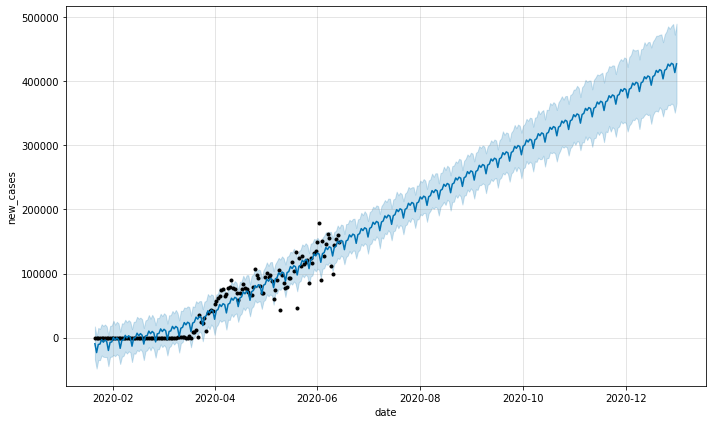

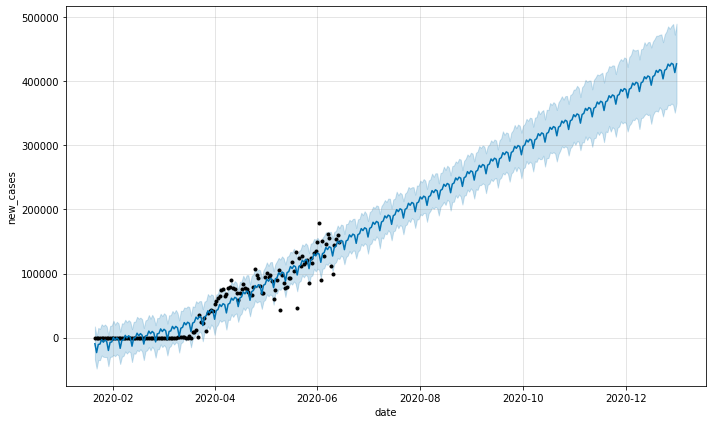

In [0]:
pd.plotting.register_matplotlib_converters()

predict_fig = model.plot(forecast_pd, xlabel='date', ylabel='new_cases')
display(predict_fig)

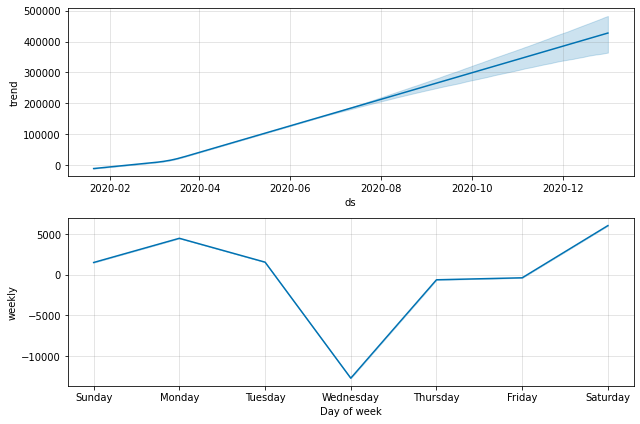

In [0]:
display(figures = model.plot_components(forecast_pd))

# IV. Distributed Tree Algorithms (Optional)
## PLANET: Massively Parallel Learning of Tree Ensembles with MapReduce
https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/36296.pdf   


The greedy tree induction algorithm we have described
is simple and works well in practice. However, it does not
scale well to large training datasets. FindBestSplit requires
a full scan of the node’s input data, which can be large at
higher levels of the tree. Large inputs that do not fit in main
memory become a bottleneck because of the cost of scanning
data from secondary storage. Even at lower levels of the tree
where a node’s input dataset D is typically much smaller
than D, loading D into memory still requires reading and
writing partitions of D to secondary storage multiple times.

PLANET uses MapReduce to distribute and scale tree induction to very large datasets.
__TODO__: Step by Step PLANET 
[See slides for now](https://docs.google.com/presentation/d/1Womuq5YmCNfvRZceguNjettzK0_hh3XojIanrqZ_auQ/edit#slide=id.g2b2b939f7f_1_244)